# Aggregated Daily Sentiment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from main import get_data
(root, data_path, presidents, cities, countries, years, colors) = get_data()
timeframe = ('2018-08-01', '2022-07-31')

In [5]:
def add_day_and_get_daily_sentiment(data):
    # Group the data by day and calculate the average 'Compound' value
    # convert to datetime
    data['created_at'] = pd.to_datetime(data['created_at'])
    data['day'] = data['created_at'].dt.date
    daily_sentiment = data.groupby('day')['Compound'].mean().reset_index()
    return data, daily_sentiment

In [6]:
def get_compound_mean(data):
    assert 'Compound' in data.columns
    return data['Compound'].mean()

In [71]:
def plot_sentiment_with_highlights_and_timeframes(daily_sentiment, title, location, columns, averages, mean_location=None, significant_points=None, timeframe=None, colors=None, save_path=None):
    """
    Plot sentiment scores with highlights and timeframes.

    Parameters:
    daily_sentiment (DataFrame): Data containing sentiment scores.
    title (str): The title of the plot.
    columns (list): The columns from the DataFrame to plot.
    averages (list): Averages for each column to plot as horizontal lines.
    mean_location (float, optional): A location's mean sentiment to be plotted as a horizontal line.
    significant_points (list of str/datetime, optional): Points to be highlighted on the plot.
    timeframe (tuple of str/datetime, optional): A timeframe to highlight on the plot.
    colors (list): Colors for each column line and average line.
    save_path (str, optional): Path to save the figure.
    """
    plt.figure(figsize=(15, 8))
    
    # Ensure colors is a list with enough colors
    if not colors or len(colors) < len(columns):
        raise ValueError("Colors list is not provided or does not have enough colors.")
    
    # Plot lines for each sentiment column
    for i, column in enumerate(columns):
        sns.lineplot(x='day', y=column, data=daily_sentiment, color=colors[i], label=f'{column.capitalize()} Sentiment')
        if averages[i] is not None:
            plt.axhline(y=averages[i], color=colors[i], linestyle='--', linewidth=2, label=f'{column.capitalize()} Mean Sentiment({averages[i]:.2f})')

    # Highlight significant points
    if significant_points:
        for point in significant_points:
            plt.scatter(daily_sentiment['day'], daily_sentiment[point], color='red', s=50, zorder=5, label='Significant Point' if point == significant_points[0] else "")

    # Highlight the timeframe
    if timeframe:
        plt.axvspan(pd.to_datetime(timeframe[0]), pd.to_datetime(timeframe[1]), color='yellow', alpha=0.3, label='Significant Period')

    # Plot mean location horizontal line
    if mean_location is not None:
        plt.axhline(y=mean_location, color='green', linestyle='--', linewidth=2, label=f'Mean Sentiment in {location} ({mean_location:.2f})')

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    sns.despine()
    plt.legend()
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, format='png', bbox_inches='tight')
    plt.show()


In [29]:
# def plot_sentiment_with_highlights_and_timeframes(daily_sentiment, title, mean_location=None, significant_points=None, timeframe=None, colors=None, average_compound=None, save_path=None):
#     plt.figure(figsize=(15, 8))
#     sns.lineplot(x='day', y='Compound', data=daily_sentiment, color=colors[1])

#     if significant_points:
#         for point in significant_points:
#             point_date = pd.to_datetime(point).date()
#             if point_date in daily_sentiment['day'].values:
#                 plt.scatter(point_date, daily_sentiment.loc[daily_sentiment['day'] == point_date, 'Compound'], color=colors[0], s=100, edgecolor='black', zorder=5)

#     if timeframe:
#         plt.axvspan(pd.to_datetime(timeframe[0]).date(), pd.to_datetime(timeframe[1]).date(), color=colors[0], alpha=0.3)

#     plt.axhline(0, color='gray', linestyle='--', linewidth=1)

#     if average_compound:
#         plt.axhline(average_compound, color='black', linestyle='--', linewidth=2, label=f'President Average Sentiment Score ({average_compound:.2f})')
#         offset = (daily_sentiment['Compound'].max() - daily_sentiment['Compound'].min()) * 0.02
#         plt.text(daily_sentiment['day'].max(), average_compound + offset, f' {average_compound:.2f}', verticalalignment='bottom', horizontalalignment='right', color='black', fontsize=10)

#     # Plot the second horizontal line if the value is provided
#     if mean_location is not None:
#         plt.axhline(mean_location, color=colors[0], linestyle='--', linewidth=2, label=f'Mean {location} Sentiment Score ({mean_location:.2f})')
#         # Adjust the label position for the second line
#         offset = (daily_sentiment['Compound'].max() - daily_sentiment['Compound'].min()) * 0.03  # Slightly larger offset for clarity
#         plt.text(daily_sentiment['day'].max(), mean_location - offset, f' {mean_location:.2f}', verticalalignment='top', horizontalalignment='right', color=colors[0], fontsize=10)

#     plt.title(title)
#     plt.xlabel('Date')
#     plt.ylabel('Sentiment Score')
#     sns.despine()
#     plt.legend()
#     plt.tight_layout()

#     if save_path:
#         plt.savefig(save_path, format='png', bbox_inches='tight')
#     plt.show()


In [ ]:
# trump_significant_points = {
#     'Birmingham': ['2019-10', '2021-05'],
#     'London': ['2021-05']
# }
# johnson_significant_points = {
#     'Birmingham': ['2020-08', '2022-04', '2020-04', '2021-02'],
#     'NYC': ['2019-12']
# }
# significant_points = [pd.to_datetime(significant_points).date()]

In [ ]:
# Plotting one column
# TODO: adjust function where I called it before
# plot_sentiment_with_highlights_and_timeframes(
#     daily_sentiment=your_dataframe,
#     title="Sentiment for Trump",
#     columns=['trump'],
#     averages=[average_trump],
#     colors=['red'],  # You can specify more colors if needed
#     save_path="your_save_path.png"
# )

# Plotting two columns
# plot_sentiment_with_highlights_and_timeframes(
#     daily_sentiment=your_dataframe,
#     title="Sentiment for Trump and Johnson",
#     columns=['trump', 'johnson'],
#     averages=[average_trump, average_johnson],
#     colors=['red', 'blue'],  # Colors for Trump and Johnson, respectively
#     save_path="your_save_path.png"
# )


In [ ]:
mean_compound = pd.read_pickle('results/mean_compound.pkl')

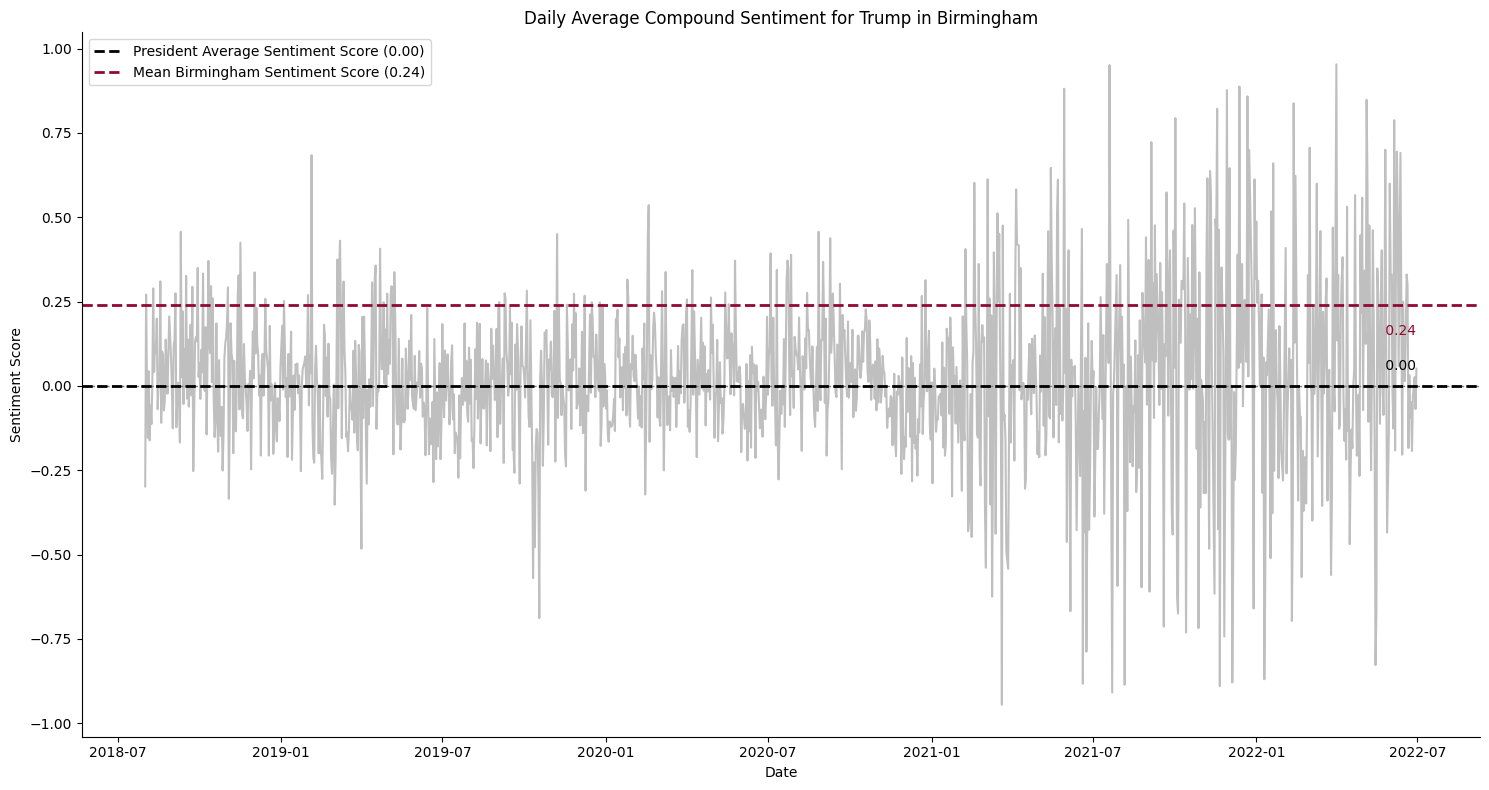

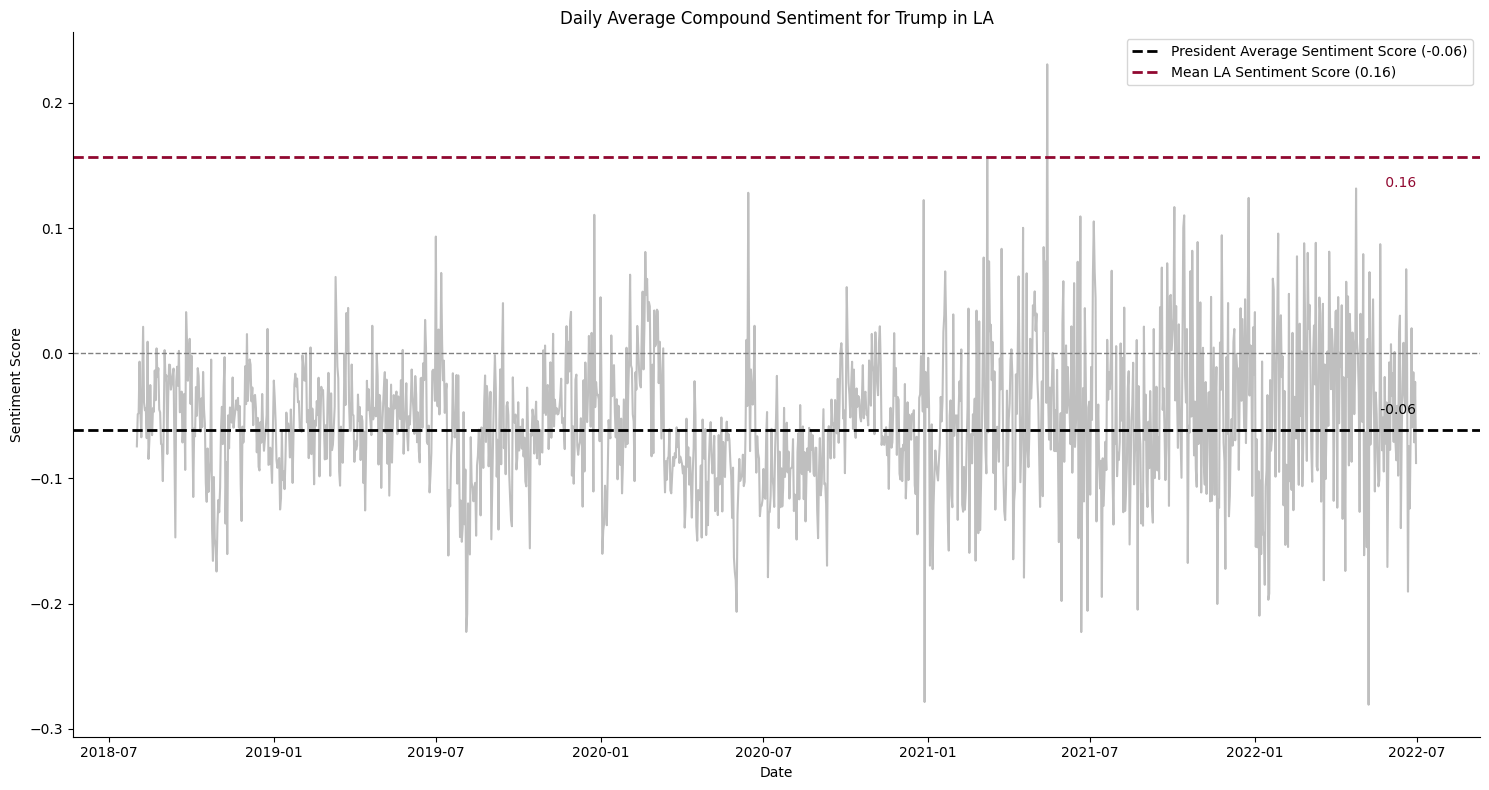

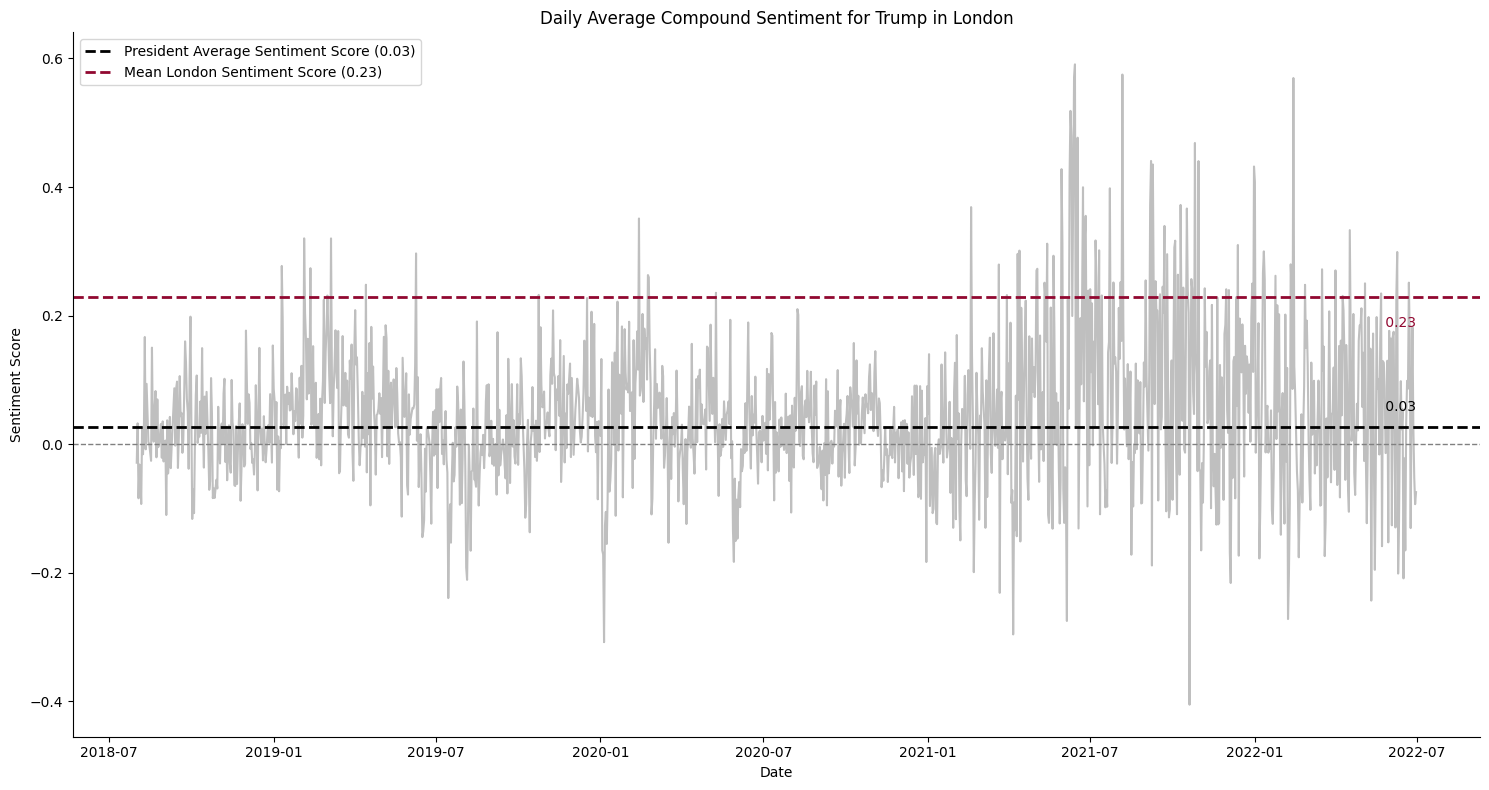

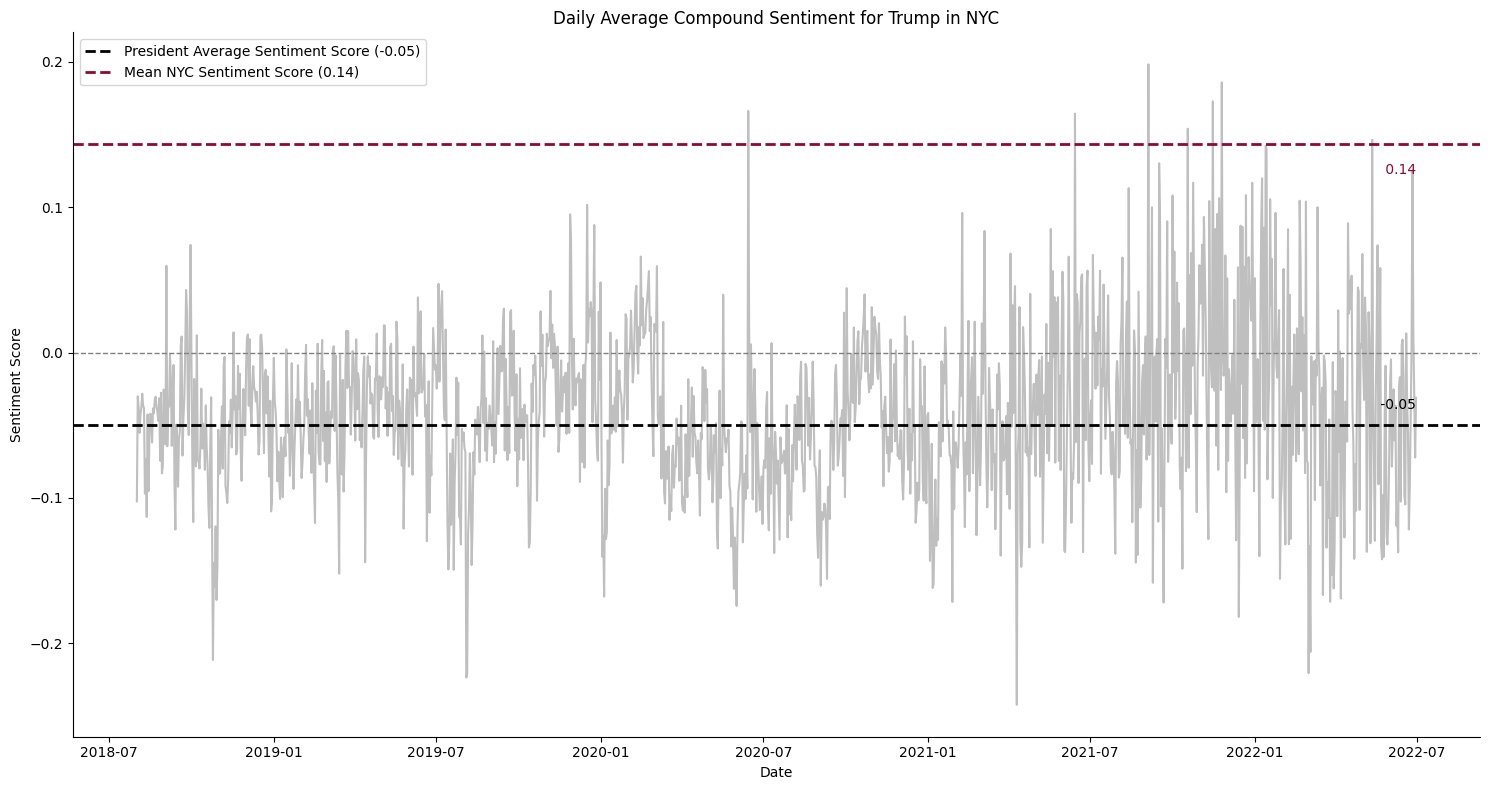

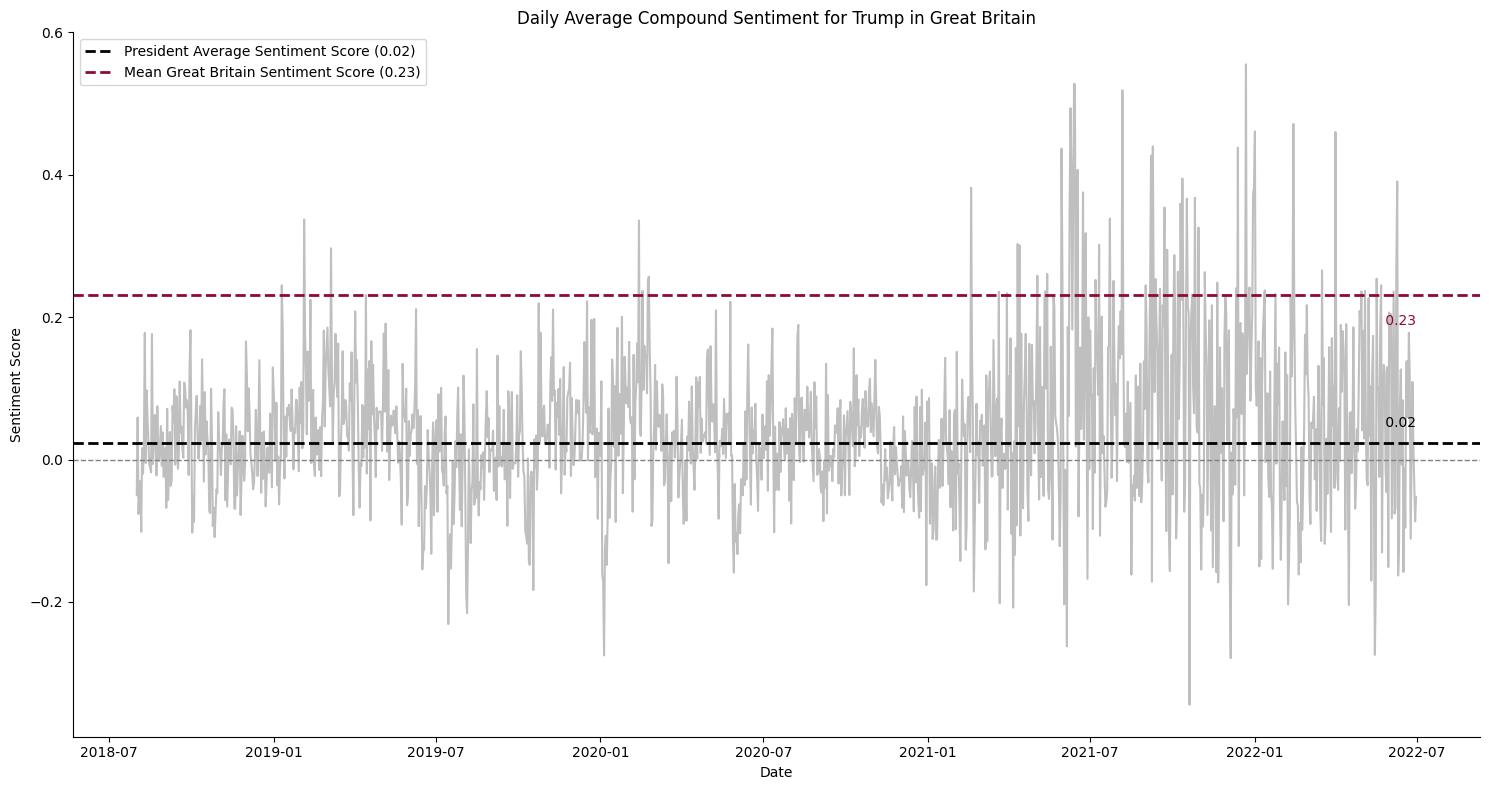

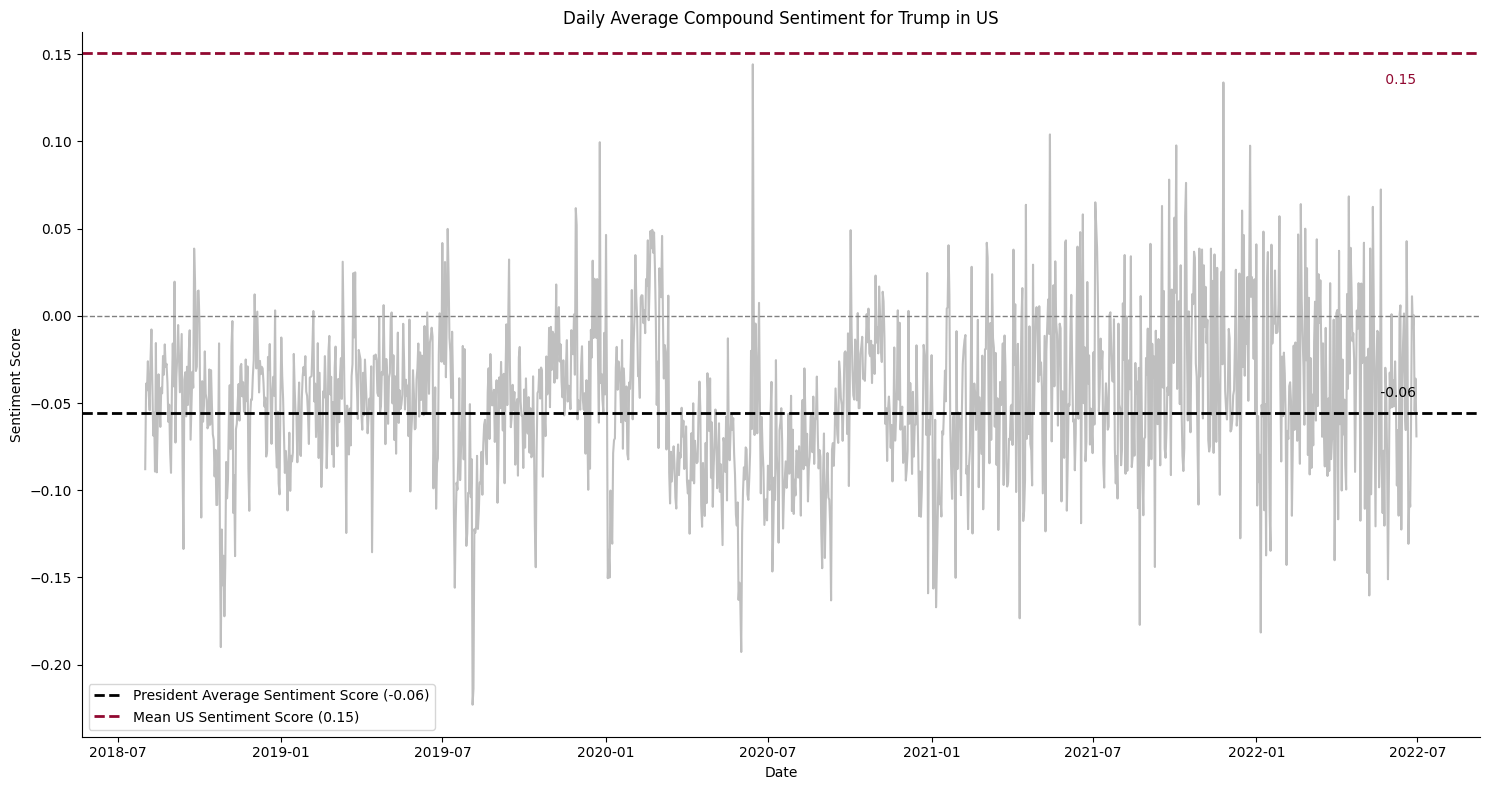

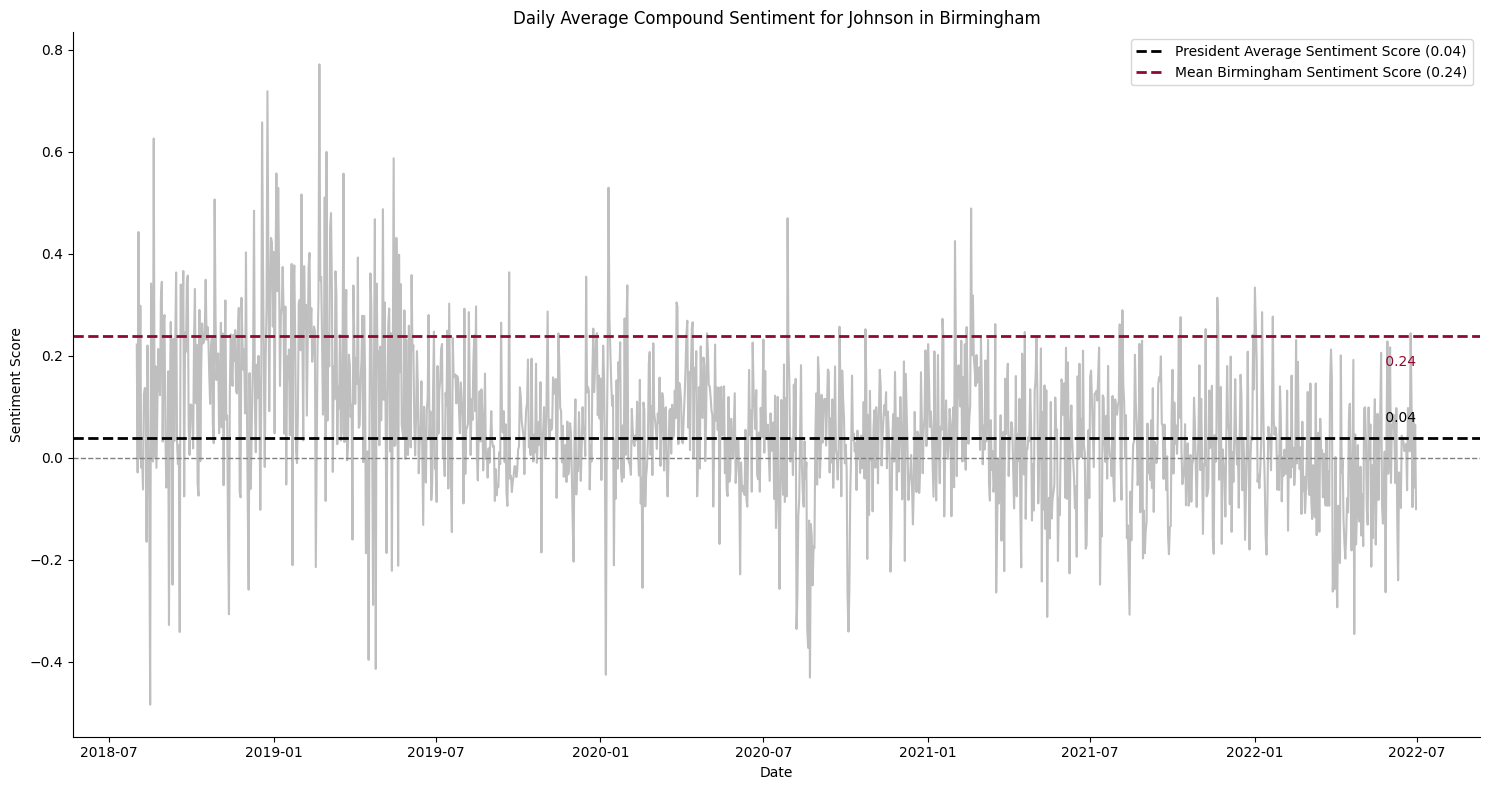

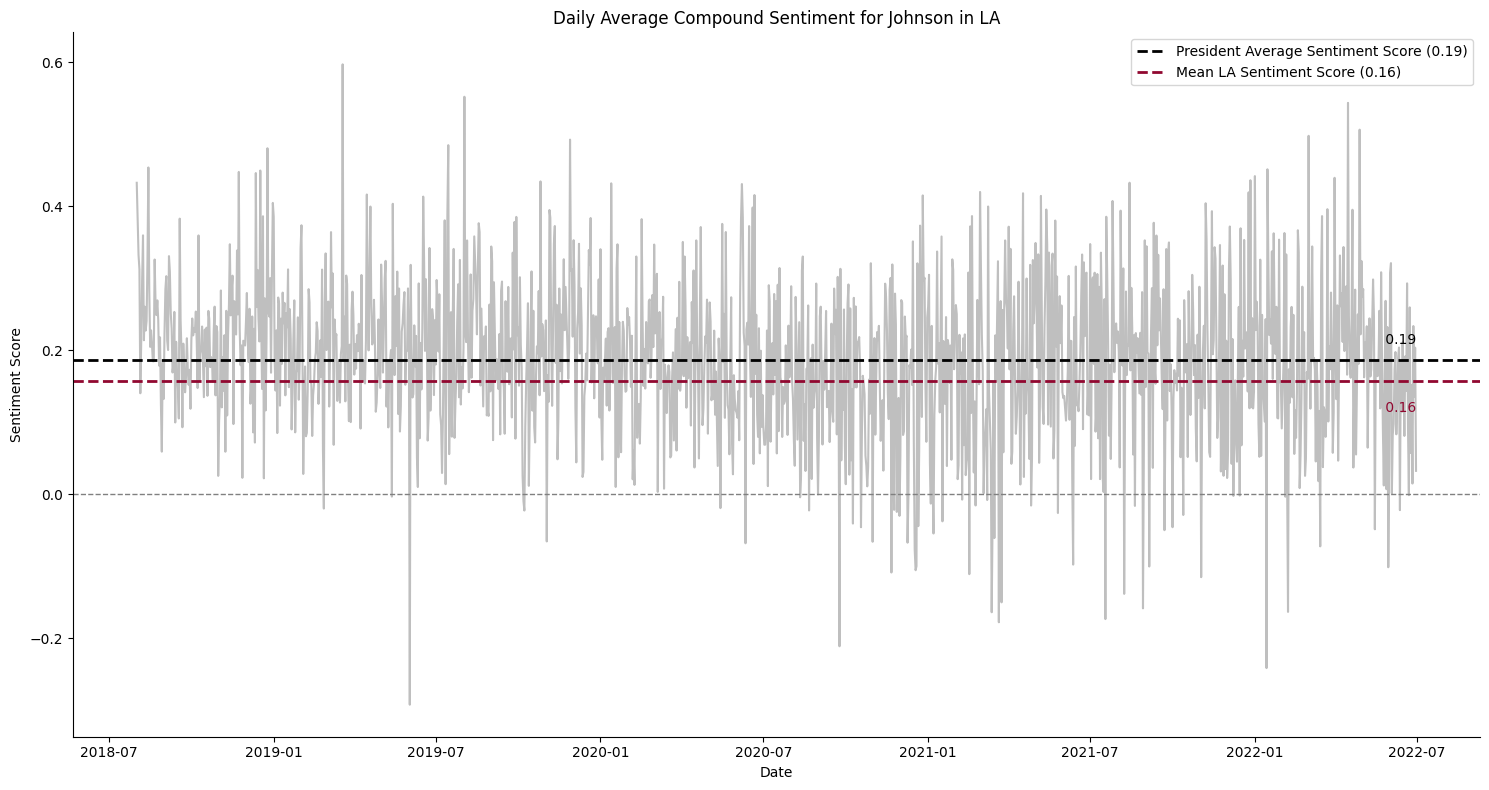

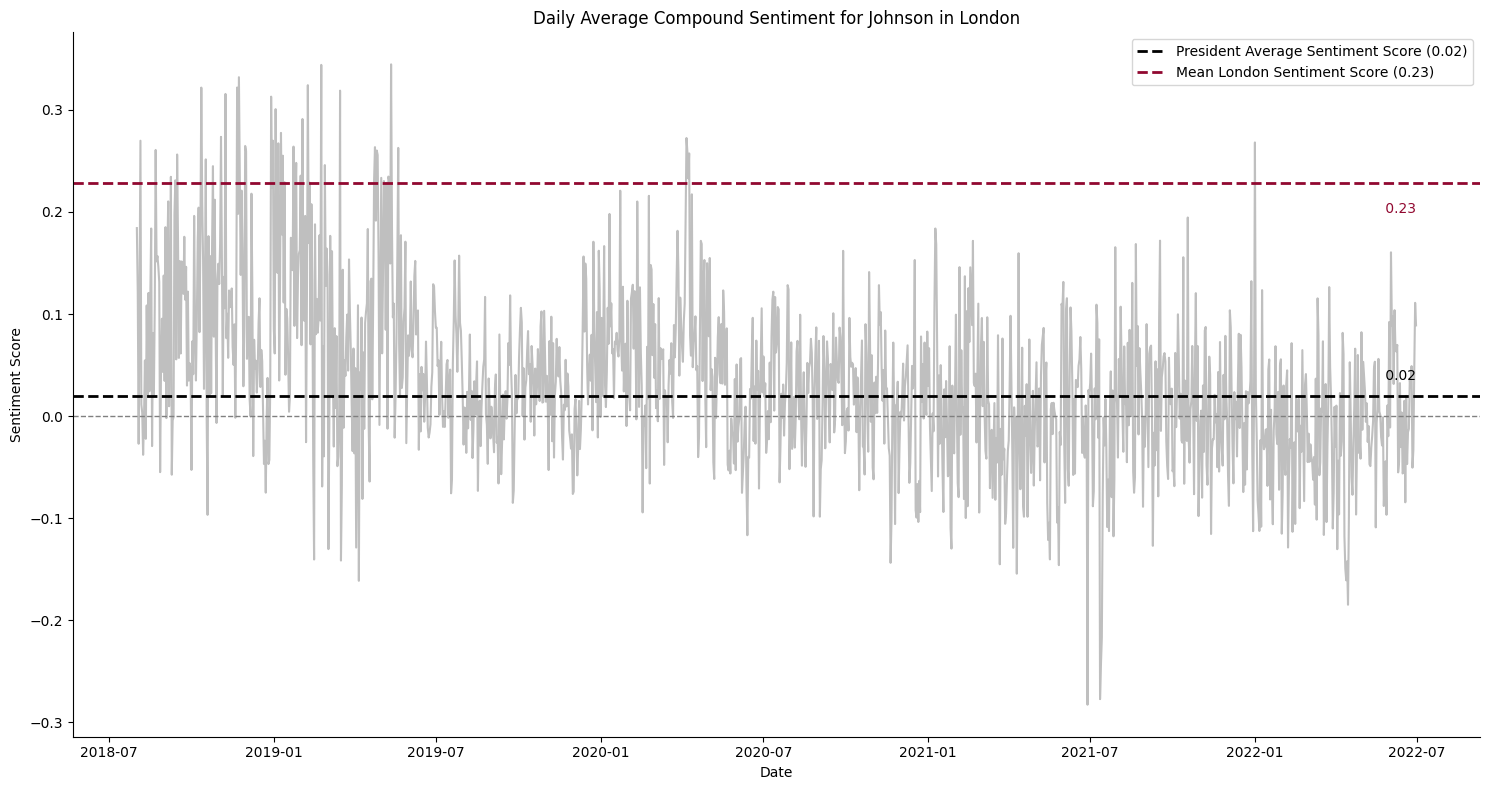

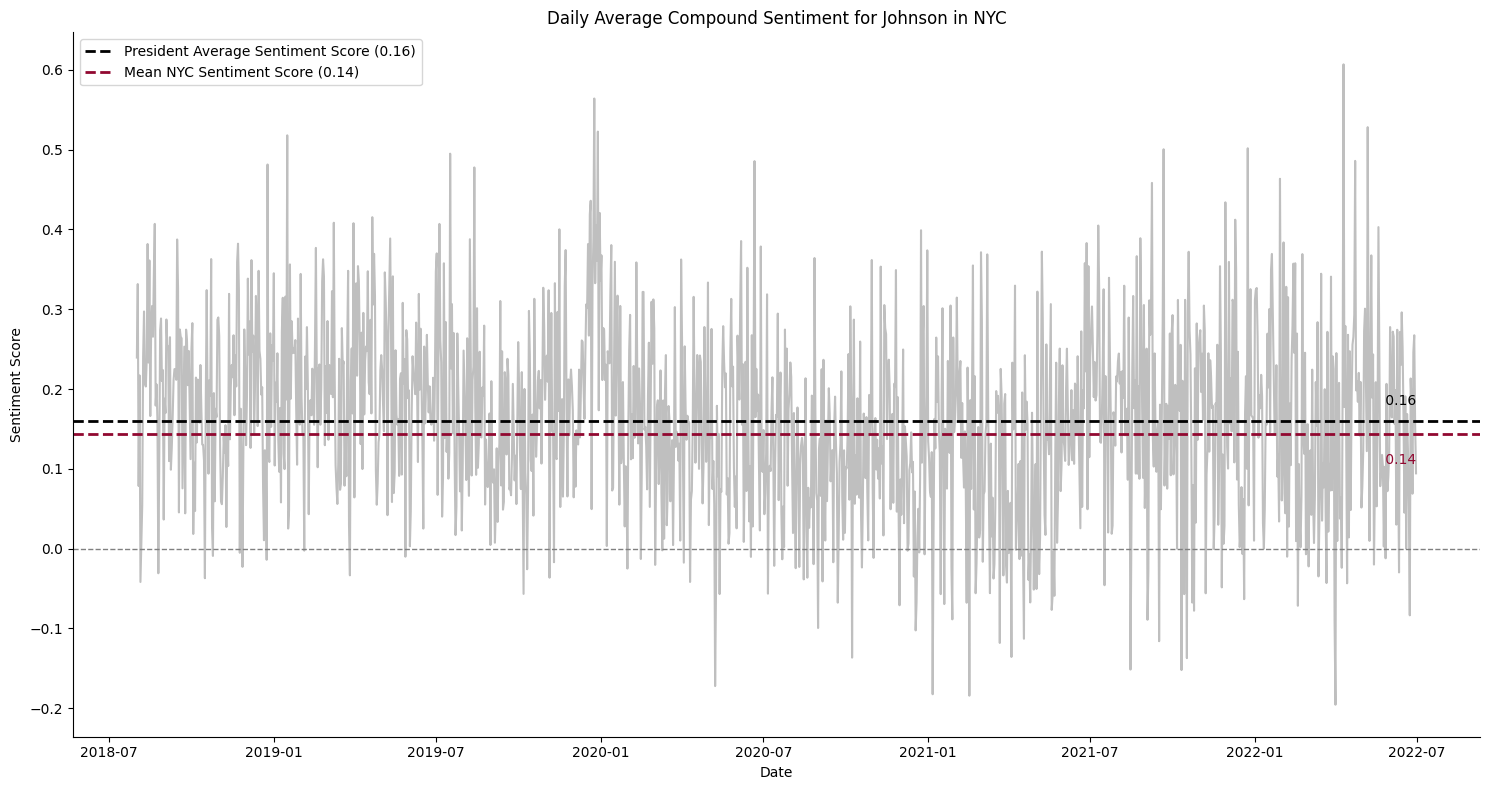

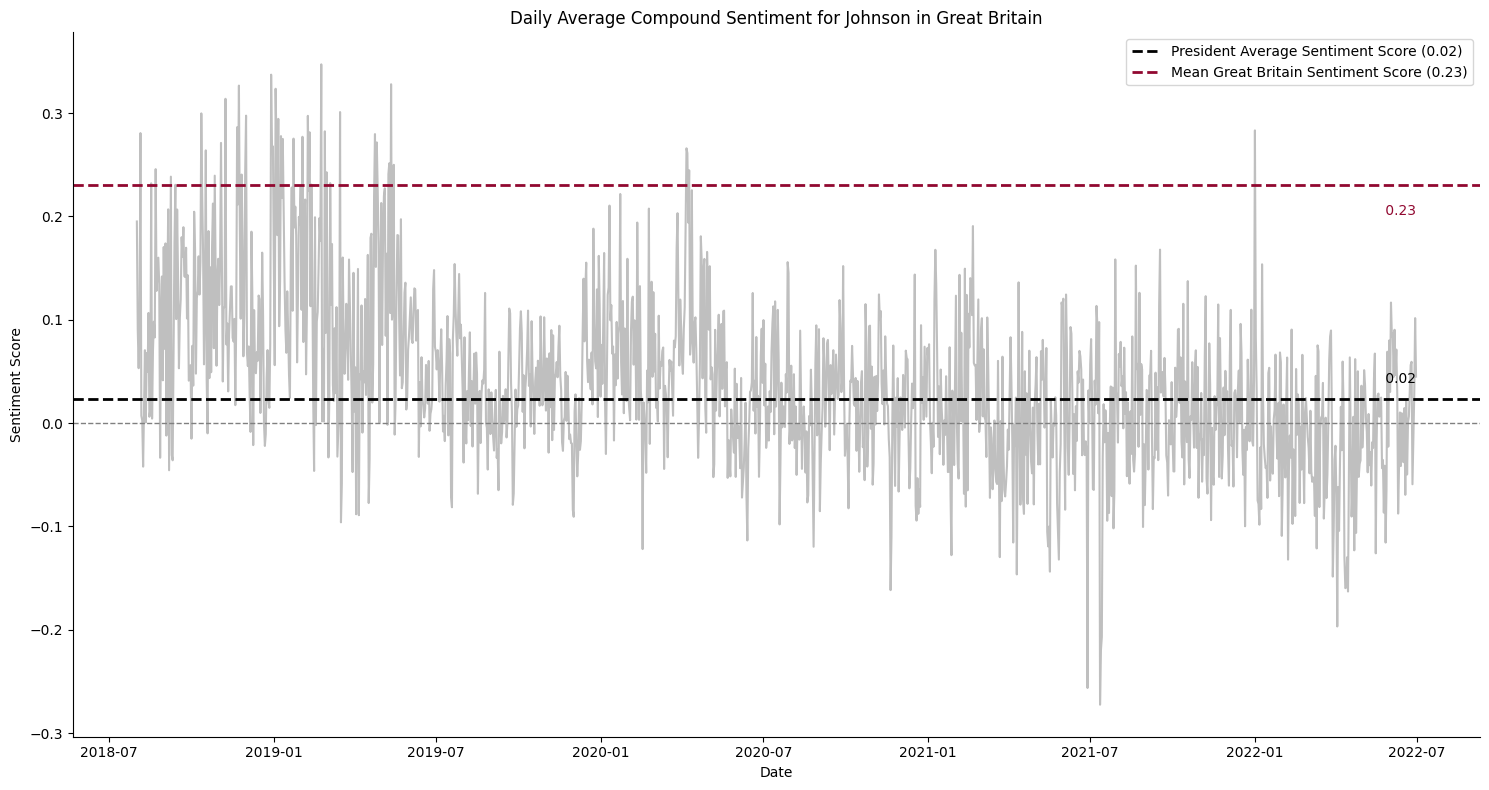

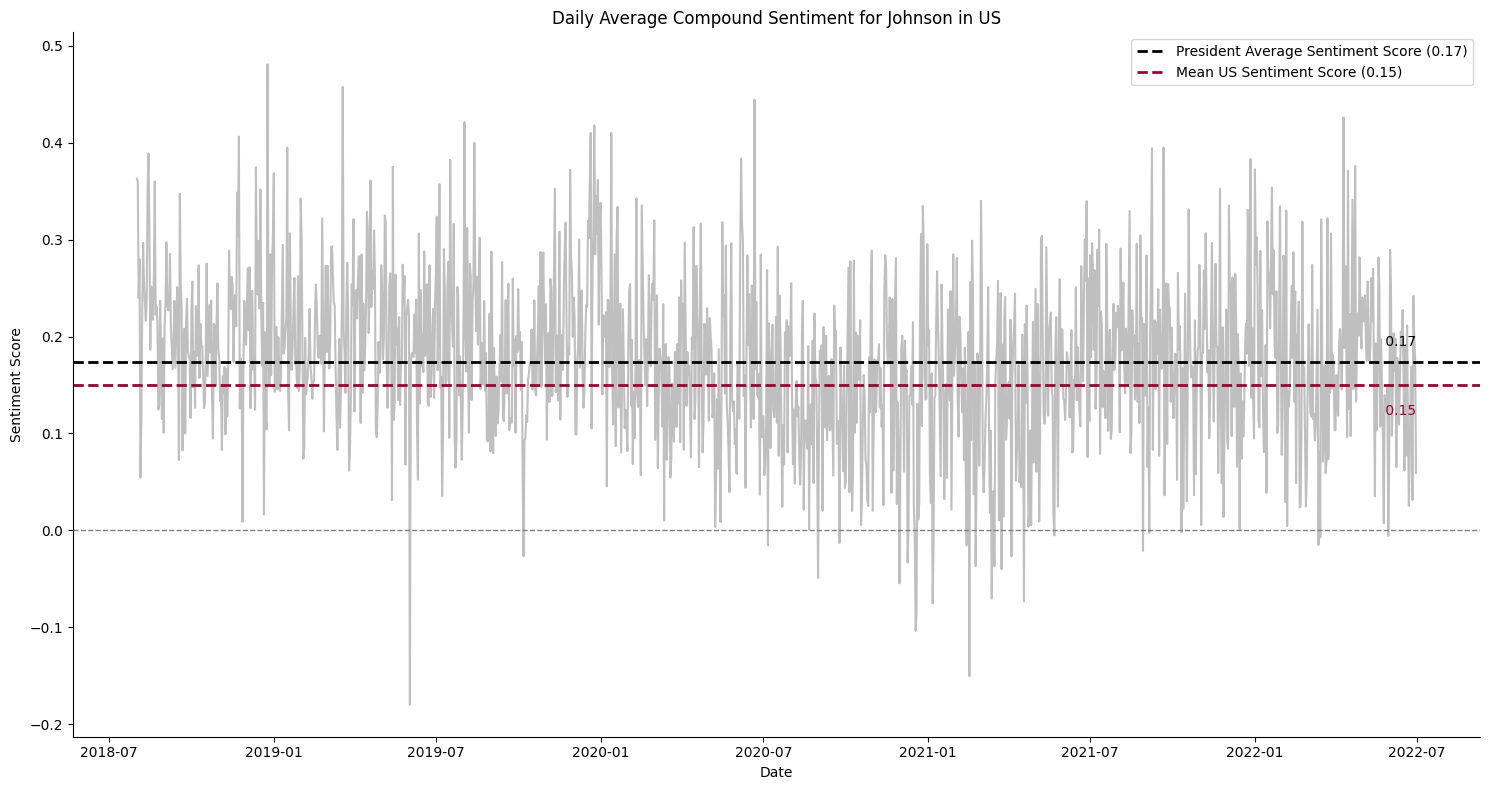

In [32]:
for president in presidents:
    for location in (cities + countries):
        title = f'Daily Average Compound Sentiment for {president.capitalize()} in {location}'
        filepath = f'{data_path}{president}-{location}.pkl'
        data = pd.read_pickle(filepath)
        data, daily_sentiment = add_day_and_get_daily_sentiment(data)
        average_compound = get_compound_mean(data)
        plot_sentiment_with_highlights_and_timeframes(daily_sentiment,
                                                title,
                                                colors=colors,
                                                average_compound=average_compound,
                                                mean_location=mean_compound.at['All',location],
                                                save_path=f'visualizations/{president}-{location}.png')

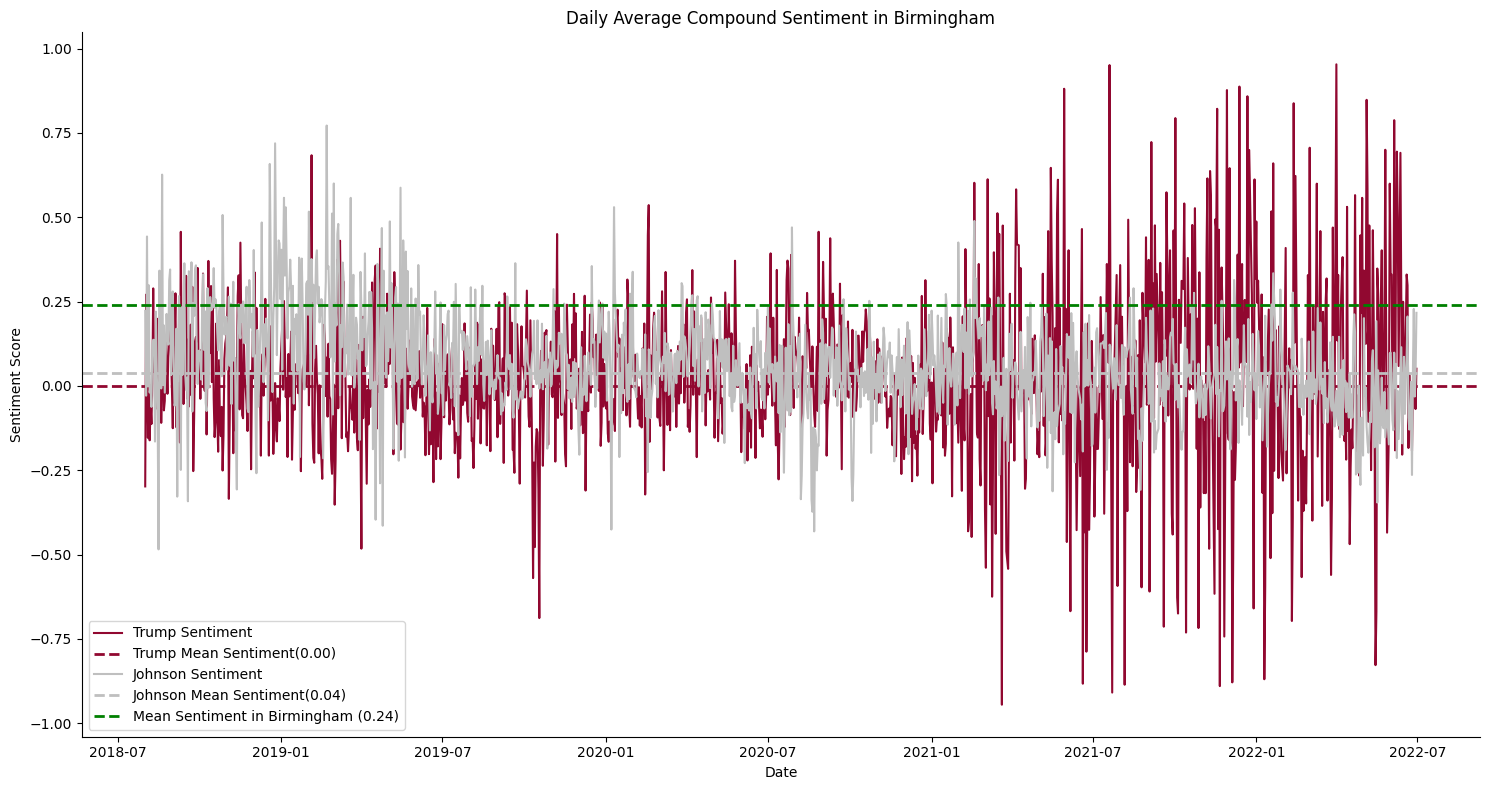

In [74]:
for location in (cities + countries):
    title = f'Daily Average Compound Sentiment in {location}'
    filepath_trump = f'{data_path}trump-{location}.pkl'
    filepath_johnson = f'{data_path}johnson-{location}.pkl'
    trump = pd.read_pickle(filepath_trump)
    johnson = pd.read_pickle(filepath_johnson)
    trump, trump_daily_sentiment = add_day_and_get_daily_sentiment(trump)
    johnson, johnson_daily_sentiment = add_day_and_get_daily_sentiment(johnson)
    trump_average_compound = get_compound_mean(trump)
    johnson_average_compound = get_compound_mean(johnson)
    presidents_daily_sentiment = trump_daily_sentiment.rename(columns={'Compound': presidents[0]})
    presidents_daily_sentiment[presidents[1]] = johnson_daily_sentiment['Compound']
    
    plot_sentiment_with_highlights_and_timeframes(presidents_daily_sentiment,
                                            title=title,
                                            location=location,
                                            columns=['trump', 'johnson'],
                                            averages=[trump_average_compound, johnson_average_compound],
                                            mean_location=mean_compound.at['All',location],
                                            colors=colors,
                                            save_path=f'visualizations/presidents-{location}.png')